In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Load the dataset
df=pd.read_csv('CarPrice_Assignment.csv')

In [2]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
X=df[['enginesize','horsepower','citympg','highwaympg']]#Numerical features only
Y=df['price']

In [4]:
#Split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [5]:
#Feature SCALING
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [6]:
#Train the Model(Fit the X n Y val in a St line)
model=LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [7]:
#Prediction
Y_pred=model.predict(X_test_scaled)

In [8]:
#Model Coefficients and Metrics
#print("="*50)
print('Name:U POOJA ')
print('Reg.No: 25011745')
print("MODEL COEFFICIENTS:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:}: {coef:}")
print(f"{'Intercept':}: {model.intercept_:}")

Name:U POOJA 
Reg.No: 25011745
MODEL COEFFICIENTS:
enginesize: 4523.404901011966
horsepower: 1694.2232554525806
citympg: -392.5731841571549
highwaympg: -816.3577991826088
Intercept: 13223.414634146342


In [9]:
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':}: {mean_squared_error(Y_test, Y_pred):}")
print(f"{'MAE':}: {mean_absolute_error(Y_test,Y_pred):}")
print(f"{'RMSE':}: {np.sqrt(mean_squared_error(Y_test,Y_pred)):}")
print(f"{'R-squared':}: {r2_score(Y_test,Y_pred):}")
#print("="*50)


MODEL PERFORMANCE:
MSE: 16471505.900042146
MAE: 2892.628134137953
RMSE: 4058.5103055237087
R-squared: 0.7913520781370976


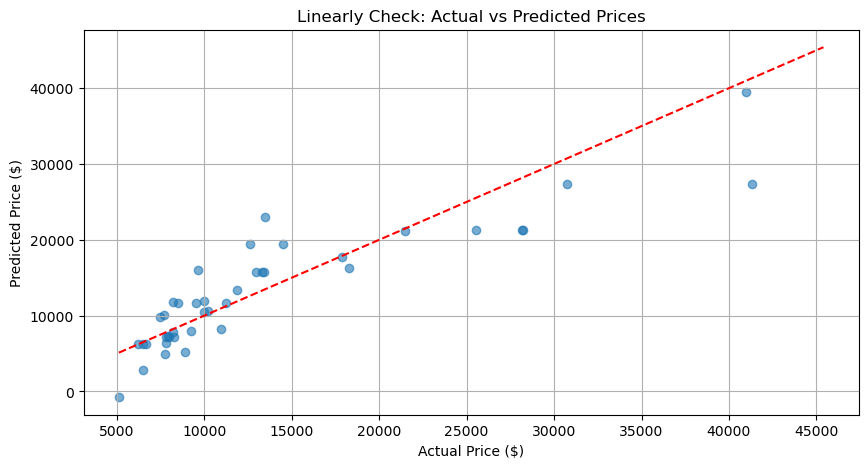

In [10]:
#Linearity Check
plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred,alpha=0.6)
plt.plot([Y.min(),Y.max()], [Y.min(),Y.max()], 'r--')
plt.title("Linearly Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

In [11]:
residuals= Y_test-Y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statsitic: {dw_test:.2f})",
      "\n(Values close to 2 indicate no autocorrection)")


Durbin-Watson Statsitic: 2.28) 
(Values close to 2 indicate no autocorrection)


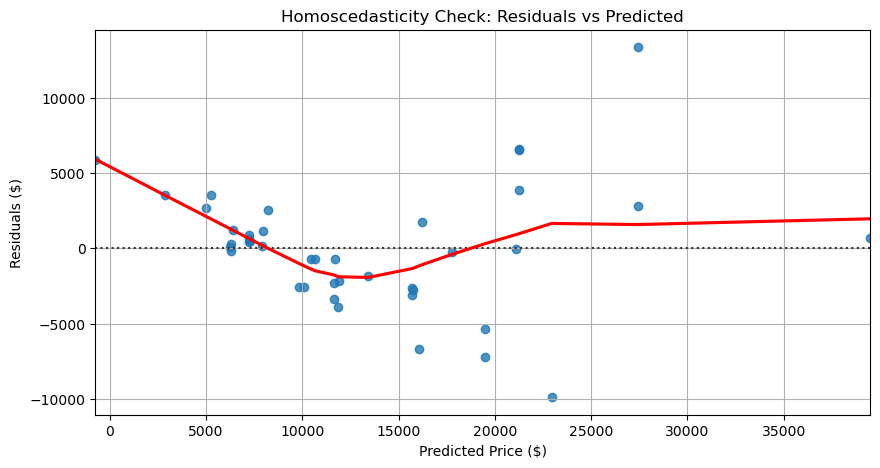

In [14]:
plt.figure(figsize=(10,5))
sns.residplot(x=Y_pred, y=residuals,lowess=True, line_kws={'color':'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Q-Q Plot')

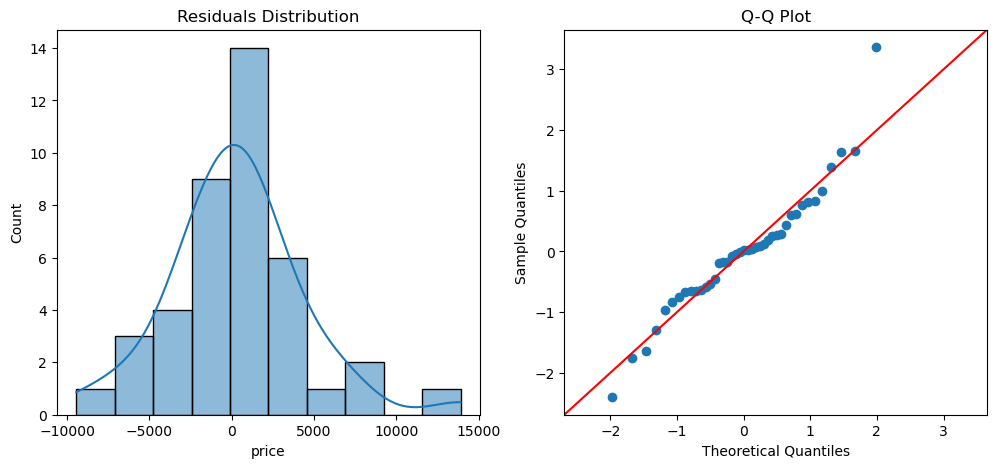

In [16]:
#Normality od residuals
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")